In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv("thirdDown.csv")

df = df.drop(columns=['pass_length.1', 'Unnamed: 0'])

df.head()



,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,NaN,0.0,0.386222,0.567801,4.926552,0.0


In [3]:
df = pd.get_dummies(df) 
df.head()

,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted,play_type_pass,play_type_run,pass_length_deep,pass_length_short,run_location_left,run_location_middle,run_location_right
0,190,2018090600,1,0,10,39.0,1681.0,3.0,0.0,0.415009,0.333712,2.250232,1.0,1,0,1,0,0,0,0
1,256,2018090600,1,0,1,1.0,1559.0,3.0,0.0,0.204515,0.749825,5.661931,0.0,1,0,0,1,0,0,0
2,344,2018090600,1,0,4,92.0,1464.0,3.0,0.0,0.093928,0.213978,-1.832560,0.0,1,0,0,1,0,0,0
3,445,2018090600,1,0,5,39.0,1404.0,3.0,0.0,0.395592,0.377457,2.642543,1.0,0,1,0,0,0,0,1
4,636,2018090600,1,0,3,3.0,1207.0,3.0,0.0,0.386222,0.567801,4.926552,0.0,1,0,0,1,0,0,0


In [4]:


# X = df[['shotgun', 'no_huddle', 'ydstogo', 'yardline_100', 'half_seconds_remaining', 'score_differential',
#        'fg_prob', 'td_prob', 'ep', 'play_type_pass', 'play_type_run', 'pass_length_deep', 'pass_length_short', 
#        'run_location_left', 'run_location_middle', 'run_location_right']]

target = df['third_down_converted']
target_names = ["not_converted", "converted"]








In [17]:
data = df.drop(['third_down_converted', 'play_id', 'game_id'], axis=1)
feature_names = data.columns
data = np.array(data)


In [18]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size =0.25, random_state=42)


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.607679180887372

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6417235494880547

In [27]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

td_prob                   0.161847
ep                        0.147592
half_seconds_remaining    0.147108
fg_prob                   0.146961
score_differential        0.114674
ydstogo                   0.106018
yardline_100              0.088309
pass_length_short         0.025928
pass_length_deep          0.017381
shotgun                   0.010707
no_huddle                 0.008834
play_type_pass            0.007271
play_type_run             0.007018
run_location_left         0.003578
run_location_middle       0.003400
run_location_right        0.003374
down                      0.000000
dtype: float64

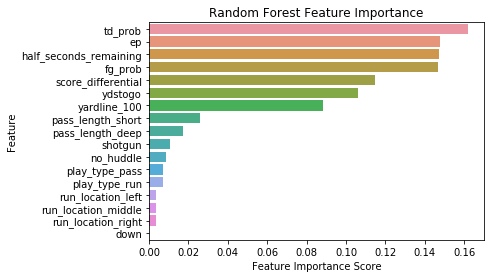

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")

plt.show()